<a href="https://colab.research.google.com/github/ndb796/Deep-Learning-Basic-for-KISA/blob/master/Basic_DNN_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # GPU 객체 선언

In [ ]:
# MNIST 데이터 셋 불러오기
train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

batch_size = 64 # 배치 사이즈 설정

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# 임의의 이미지 분류 딥 뉴럴 네트워크 선언
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(784, 480) # 입력 크기: 784 차원(픽셀)
        self.l2 = nn.Linear(480, 200)
        self.l3 = nn.Linear(200, 80)
        self.l4 = nn.Linear(80, 10) # 10개로 분류 (출력층)

    def forward(self, x):
        x = x.view(-1, 784)  # (배치 사이즈, 1, 28, 28) 크기의 데이터를 (배치 사이즈, 784) 형태로 변경
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        return self.l4(x)

In [ ]:
model = Net().to(device)
print(model)

Net(
  (l1): Linear(in_features=784, out_features=480, bias=True)
  (l2): Linear(in_features=480, out_features=200, bias=True)
  (l3): Linear(in_features=200, out_features=80, bias=True)
  (l4): Linear(in_features=80, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss() # 손실 함수 설정
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.2) # 최적화 함수

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step() # 모델 가중치 업데이트
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.8f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data))

In [ ]:
def test():
    model.eval()
    loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss += criterion(output, target).data.item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.29973841
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.30202866
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.28362989
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.26434207
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.24318957
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.20229530
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.13752699
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.97874355
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.71705973
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.46533930

Test set: Average loss: 0.0192, Accuracy: 6894/10000 (69%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.09499383
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.90491831
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.98894066
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.62206197
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.58444732
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.41077390
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.67227507
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.50685823
Train Epoch: 2 

숫자 이미지 X의 크기: torch.Size([1, 28, 28])
숫자 이미지 X의 레이블: 7
tensor([[  1.2270,  -2.3440,   3.4852,   5.0390,  -5.9945,  -0.8671, -10.7527,
          10.6472,  -0.4550,   1.7571]], device='cuda:0',
       grad_fn=<AddmmBackward>)


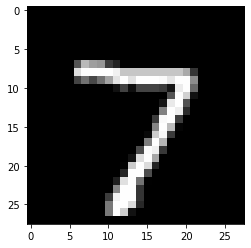

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_data = test_dataset[0][0].to(device)
image_label = test_dataset[0][1]
print('숫자 이미지 X의 크기:', image_data.size())
print('숫자 이미지 X의 레이블:', image_label)
print(model(image_data))
plt.imshow(image_data.cpu().numpy()[0], cmap='gray')